In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

In [36]:
# Read the X from the csv file
dataFrame = pd.read_csv('./dataGenerator/nonLinearSeperableData.csv', header=None)
dataFrame.columns = ['x1', 'x2', 'y']
print(dataFrame.head())

# convert the dataFrame to numpy array
X = np.array(dataFrame[['x1', 'x2']])
Y = np.array(dataFrame['y'])

          x1         x2  y
0  24.859096  21.564275  0
1 -15.759268   5.591729  0
2  66.710642 -26.610435  0
3  90.393772 -50.464119  0
4   6.756713  32.964487  0


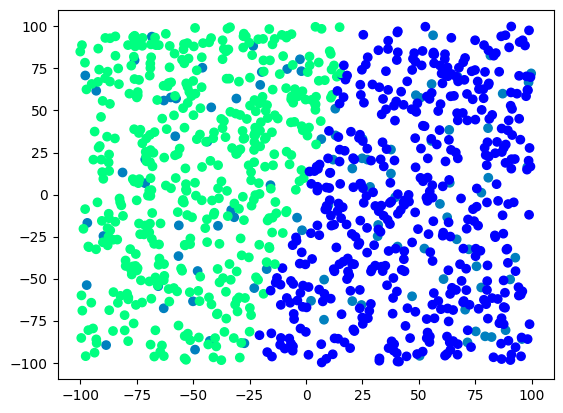

In [37]:
# ploting the X
plt.scatter(X[:,0], X[:,1], c=Y, cmap='winter')
plt.show()

In [38]:
# Pocket Algorithm

numFeatures = 2
weights = np.zeros(numFeatures)
weights[0] = 1000
weights[1] = 10
ERROR = 10000000000000
learningRate = 0.2
print("Dimension of weights: ", weights.shape)
print("Dimension of X[0]: ", X.shape)
print("Dimension of Y[0]: ", Y.shape)
done = False
error = []

while not done:
    misclassified = 0
    tempWeights = weights
    for i in range(len(X)):
        if np.dot(X[i], tempWeights) > 0:
            predicted = 1
        else:
            predicted = 0

        if predicted != Y[i]:
            misclassified += 1
            tempWeights += learningRate * X[i] * (Y[i] - predicted)

    err = (misclassified / len(X)) * 100

    if (misclassified == 0) or (err > ERROR):
        done = True
        break

    ERROR = err
    weights = tempWeights
    error.append(err)

print("Weights: ", weights)

Dimension of weights:  (2,)
Dimension of X[0]:  (1000, 2)
Dimension of Y[0]:  (1000,)
Weights:  [-38938.44894759   7443.26002016]


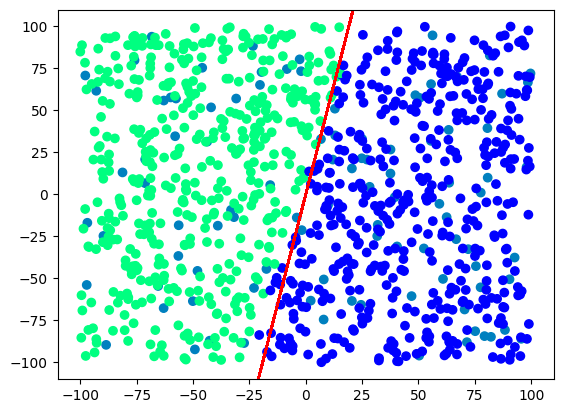

In [39]:
# plot data with linear seperator using weights
y_pred = []
for i in range(len(X)):
    y_pred.append(0 if np.sign(np.dot(X[i], weights)) == 1 else 1)

plt.scatter(X[:,0], X[:,1], c=Y, cmap='winter')
plt.plot(X[:,0], (-weights[0]/weights[1])*X[:,0], 'r-')
plt.xlim(-110, 110)
plt.ylim(-110, 110)
plt.show()

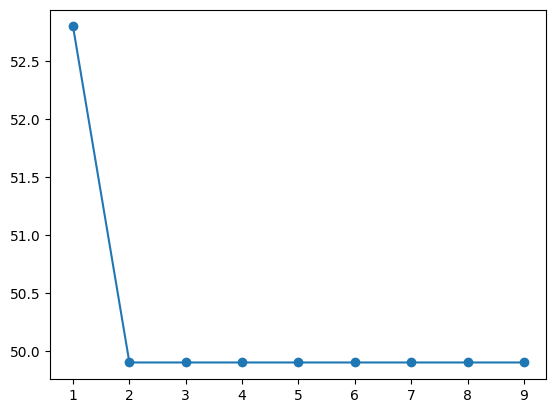

In [40]:
# plot error vs iteration
plt.plot(range(1, len(error)+1), error, marker='o')
